In [13]:
from google.colab import files
files.upload()
df = pd.read_csv("football_mini.csv")


Saving football_mini.csv to football_mini (4).csv


   Unnamed: 0               Name  Age Nationality                 Club  \
0           0           L. Messi   31   Argentina         FC Barcelona   
1           1  Cristiano Ronaldo   33    Portugal             Juventus   
2           2          Neymar Jr   26      Brazil  Paris Saint-Germain   
3           3             De Gea   27       Spain    Manchester United   
4           4       K. De Bruyne   27     Belgium      Manchester City   

       Value    Wage Position  Crossing  Finishing  ...  Penalties  Composure  \
0  110500000  565000       RF        84         95  ...         75         96   
1   77000000  405000       ST        84         94  ...         85         95   
2  118500000  290000       LW        79         87  ...         81         94   
3   72000000  260000       GK        17         13  ...         40         68   
4  102000000  355000      RCM        93         82  ...         79         88   

   Marking  StandingTackle  SlidingTackle  GKDiving  GKHandling  GKK

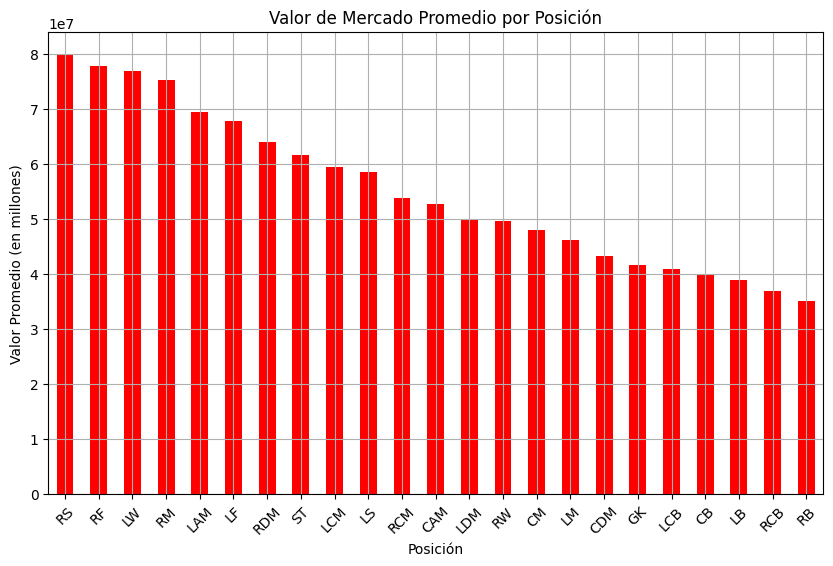

<ipython-input-16-78ef0bb56c65>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=salary_by_nationality.index, y=salary_by_nationality.values, palette='viridis')


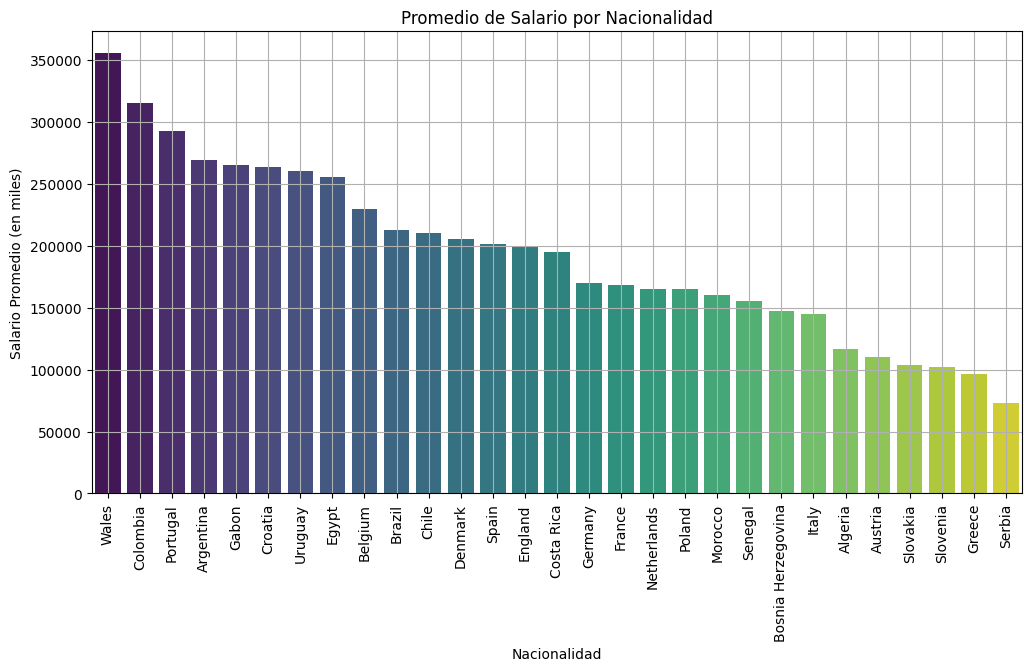

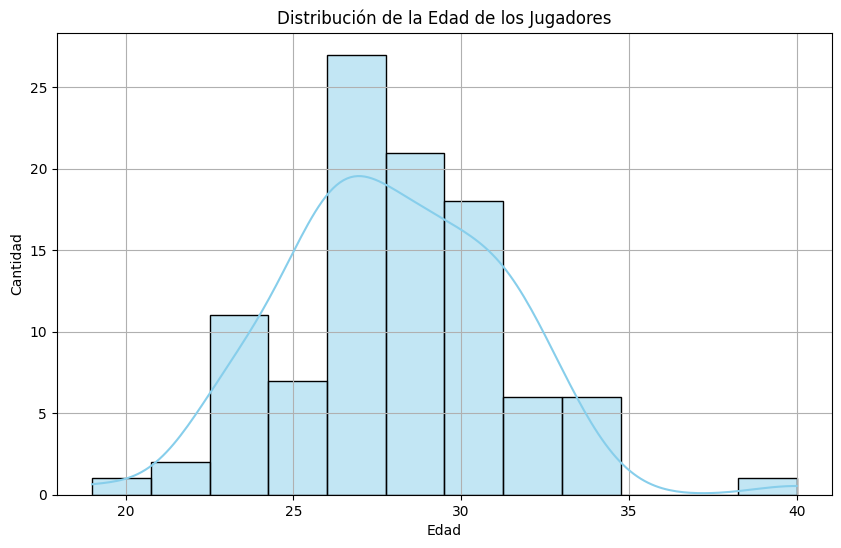

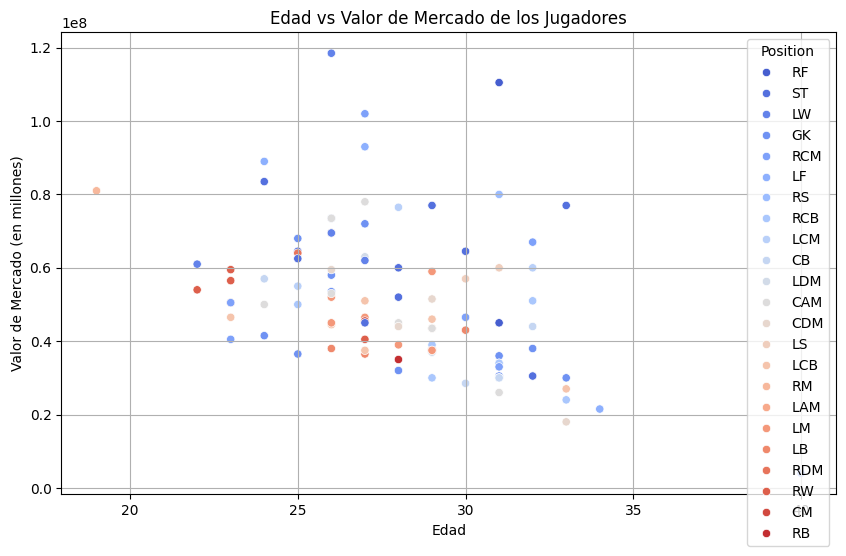

In [16]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
df = pd.read_csv("football_mini.csv")

# Exploramos el dataset
print(df.head())
print(df.info())

# Eliminamos columnas innecesarias
df = df.drop(columns=['Unnamed: 0'])


# Rellenar valores nulos solo en columnas numéricas con la media de cada columna
df[df.select_dtypes(include=['number']).columns] = df.select_dtypes(include=['number']).apply(lambda x: x.fillna(x.mean()))


# Análisis exploratorio: Valor promedio por posición
plt.figure(figsize=(10,6))
df.groupby('Position')['Value'].mean().sort_values(ascending=False).plot(kind='bar', color='red')
plt.title('Valor de Mercado Promedio por Posición')
plt.xlabel('Posición')
plt.ylabel('Valor Promedio (en millones)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Análisis: Salario promedio por nacionalidad
plt.figure(figsize=(12,6))
salary_by_nationality = df.groupby('Nationality')['Wage'].mean().sort_values(ascending=False)
sns.barplot(x=salary_by_nationality.index, y=salary_by_nationality.values, palette='viridis')
plt.title('Promedio de Salario por Nacionalidad')
plt.xlabel('Nacionalidad')
plt.ylabel('Salario Promedio (en miles)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Distribución de edades de los jugadores
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Distribución de la Edad de los Jugadores')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.grid(True)
plt.show()

# Relación entre Edad y Valor de mercado
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Value', data=df, hue='Position', palette='coolwarm')
plt.title('Edad vs Valor de Mercado de los Jugadores')
plt.xlabel('Edad')
plt.ylabel('Valor de Mercado (en millones)')
plt.grid(True)
plt.show()


In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Estándarizar las columnas numéricas
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=['number']))  # Solo las columnas numéricas

# Aplicar PCA
pca = PCA(n_components=2)  # Seleccionamos 2 componentes principales para visualización
df_pca = pca.fit_transform(df_scaled)

# Ver la varianza explicada
print(f"Varianza explicada por cada componente: {pca.explained_variance_ratio_}")


Varianza explicada por cada componente: [0.55105302 0.18113709]


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Cargar el archivo CSV
df = pd.read_csv("football_mini.csv")

# Eliminamos columnas innecesarias
df = df.drop(columns=['Unnamed: 0'])

# Rellenar valores nulos solo en columnas numéricas con la media de cada columna
df[df.select_dtypes(include=['number']).columns] = df.select_dtypes(include=['number']).apply(lambda x: x.fillna(x.mean()))

# Codificar las columnas categóricas (Position, Nationality) usando One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Position', 'Nationality'], drop_first=True)

# Verificar los tipos de columnas
print("Tipos de columnas después de la codificación:")
print(df_encoded.dtypes)

# Eliminar cualquier columna de texto o no numérica como 'Name' y 'Club'
df_encoded = df_encoded.drop(columns=['Name', 'Club'], errors='ignore')

# Definir X (características) e y (variable objetivo)
X = df_encoded.drop(columns=['Value'])
y = df_encoded['Value']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estándarizar solo las columnas numéricas
scaler = StandardScaler()

# Identificar columnas numéricas en X
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

# Aplicar la normalización solo a las columnas numéricas
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

# Inicializar y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas
print(f"MSE (Error cuadrático medio): {mse}")
print(f"R^2 (Coeficiente de determinación): {r2}")


Tipos de columnas después de la codificación:
Name                    object
Age                      int64
Club                    object
Value                    int64
Wage                     int64
                         ...  
Nationality_Slovakia      bool
Nationality_Slovenia      bool
Nationality_Spain         bool
Nationality_Uruguay       bool
Nationality_Wales         bool
Length: 89, dtype: object
MSE (Error cuadrático medio): 933472988051370.2
R^2 (Coeficiente de determinación): -0.7242413001938237


In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Eliminar columnas irrelevantes
df_encoded = df_encoded.drop(columns=['Name', 'Club'], errors='ignore')

# Definir X (características) e y (variable objetivo)
X = df_encoded.drop(columns=['Value'])
y = df_encoded['Value']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estándarizar las características numéricas
scaler = StandardScaler()
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

# Inicializar y entrenar el modelo de Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas
print(f"MSE (Error cuadrático medio): {mse}")
print(f"R^2 (Coeficiente de determinación): {r2}")


MSE (Error cuadrático medio): 142917373750000.0
R^2 (Coeficiente de determinación): 0.7360137449189632
